In [1]:
import os
import argparse

import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from matplotlib.patches import Patch

In [2]:
def load_data(folder):
    data = dict()
    
    if os.path.isfile(os.path.join(folder, 'results_moc.npy')):
        data['moc'] = np.load(os.path.join(folder, 'results_moc.npy'), allow_pickle=True).item()

    if os.path.isfile(os.path.join(folder, 'results_pesq.npy')):
        data['pesq'] = np.load(os.path.join(folder, 'results_pesq.npy'), allow_pickle=True).item()
        
    if os.path.isfile(os.path.join(folder, 'results_warpq.npy')):
        data['warpq'] = np.load(os.path.join(folder, 'results_warpq.npy'), allow_pickle=True).item()
        
    return data

In [54]:
data = load_data('output/librispeech/')

In [59]:
moc_data = data['warpq']

In [60]:
p = 0.95

for br in moc_data.keys():
    diff = np.sort(moc_data[br][:, 2] - moc_data[br][:, 0])
    idx1 = int(len(diff)*p)
    idx2 = int(len(diff) * (1-p) + 0.99)
    print(f"{br}: {diff[idx1]} {diff[idx2]}")

6000: -0.054572587029628306 -0.1618268829285885
7500: -0.00036472038156787345 -0.0902029809106426
9000: 0.015951205217710984 -0.05359937462269582
12000: 0.02212605031626902 -0.024460734617080426
15000: 0.022845688661580543 -0.014168062806676152
18000: 0.021138653821338838 -0.008802055329060476
24000: 0.019415673341678263 -0.004471125377773166
32000: 0.01779010565572775 -0.007499545921897277


In [39]:
diff

array([-0.39371813, -0.3348195 , -0.27106767, ...,  0.45212147,
        0.53908789,  0.9587993 ])

In [67]:
def load_nomad_data(csv_path):
    with open(csv_path) as f:
        lines = f.readlines()
        
    lines = lines[1:]
    scores = dict()
    for line in lines:
        name, score = line.rstrip('\n').split(',')
        br = name.split("_")[-1]
        key = name[:-len(br) - 1]
        score = float(score)
        br = int(br)
        
        if br not in scores: scores[br] = dict()
        scores[br][key] = score
    
    sorted_results = dict()
    bitrates = list(scores.keys())
    items = sorted(list(scores[bitrates[0]].keys()))
    
    for br in sorted(bitrates):
        sorted_results[br] = np.zeros(len(items))
        for i, key in enumerate(items):
            sorted_results[br][i] = scores[br][key]
        
    return sorted_results

In [68]:
lace = load_nomad_data('nomad/results_lace/nomad_avg.csv')
opus = load_nomad_data('nomad/results_opus/nomad_avg.csv')
nolace = load_nomad_data('nomad/results_nolace/nomad_avg.csv')

In [72]:
tbl = PrettyTable()
tbl.field_names = ['bitrate (bps)', 'Opus', 'LACE', 'NoLACE']

for br in lace.keys():
    tbl.add_row([br, f"{float(opus[br].mean()):.3f} ({float(opus[br].std()):.2f})", f"{float(lace[br].mean()):.3f} ({float(lace[br].std()):.2f})", f"{float(nolace[br].mean()):.3f} ({float(nolace[br].std()):.2f})"])
    
print(tbl)

+---------------+--------------+--------------+--------------+
| bitrate (bps) |     Opus     |     LACE     |    NoLACE    |
+---------------+--------------+--------------+--------------+
|      6000     | 1.360 (0.07) | 1.036 (0.14) | 0.732 (0.15) |
|      7500     | 1.066 (0.14) | 0.803 (0.17) | 0.527 (0.18) |
|      9000     | 0.810 (0.18) | 0.636 (0.19) | 0.433 (0.16) |
|     12000     | 0.541 (0.19) | 0.476 (0.17) | 0.378 (0.13) |
|     15000     | 0.440 (0.17) | 0.410 (0.15) | 0.359 (0.12) |
|     18000     | 0.388 (0.14) | 0.374 (0.13) | 0.349 (0.11) |
|     24000     | 0.352 (0.12) | 0.347 (0.11) | 0.341 (0.10) |
|     32000     | 0.339 (0.10) | 0.336 (0.10) | 0.338 (0.10) |
+---------------+--------------+--------------+--------------+


In [73]:
import tempfile

In [74]:
with tempfile.TemporaryDirectory() as dirname:
    filename = os.path.join(dirname, 'test.txt')
    with open(filename, 'w') as f:
        f.write("Hi\n")
    
    print(dirname, os.listdir(dirname))
    with open(filename, 'r') as f:
        print(f.readlines())

/tmp/tmptkbtemsx ['test.txt']
['Hi\n']


In [2]:
import nomad_audio
results = nomad_audio.nomad.predict(nmr='nomad/clean', deg='nomad/opus')

2023-10-26 09:36:50 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


NOMAD running on: cuda
Compute non-matching reference embeddings from nomad/clean


100%|██████████| 1536/1536 [00:31<00:00, 49.00it/s]


Compute degraded embeddings from nomad/opus


100%|██████████| 1536/1536 [00:31<00:00, 49.41it/s]


In [11]:
type(results[0])

pandas.core.frame.DataFrame

In [17]:
results[0].to_dict()

{'NOMAD': {'a2754352-71a5-11ee-9980-e74bf196fde2_6000': 1.37,
  'f054105e-71a4-11ee-84e7-43d90be01bd7_7500': 1.219,
  '6520cb44-71a4-11ee-a484-ffd0bec5650a_6000': 1.257,
  'cee9abb6-71a6-11ee-813a-3bd56230a6f5_6000': 1.462,
  'a8a68258-71a6-11ee-890c-1398b34ec576_18000': 0.482,
  '3522425e-71a6-11ee-a63f-db241876f81b_24000': 0.293,
  'b3e60f76-71a6-11ee-ad6d-d717abf4ef71_7500': 0.825,
  '95b25eda-71a4-11ee-bb8d-93ceef34c30c_18000': 0.292,
  'e1aabd00-71a4-11ee-bbcf-b3b5b2ea6613_32000': 0.437,
  'cd2b7abc-71a5-11ee-8468-43af2374e1e4_9000': 0.994,
  '74296d94-71a4-11ee-812c-673bb4c8104e_15000': 0.285,
  '934f2244-71a5-11ee-bd7d-ff8e9011341b_6000': 1.404,
  '018b79a6-71a6-11ee-90d0-23a2e4ebf401_32000': 0.268,
  '24918298-71a5-11ee-83ae-f7ffa23eff98_18000': 0.353,
  'c1b29990-71a5-11ee-b248-b3845f378f93_32000': 0.281,
  '216c7696-71a4-11ee-b074-8f2ea1a7cf02_32000': 0.273,
  '19a8c850-71a5-11ee-8c3c-734280d5dbfe_6000': 1.4,
  '7056b1b8-71a4-11ee-b68f-7f81e5971f6e_18000': 0.654,
  'f3f22138-

In [20]:
import shutil
import tempfile
from nomad_audio import nomad

def get_bitrates(folder):
    with open(os.path.join(folder, 'bitrates.txt')) as f:
        x = f.read()
    
    bitrates = [int(y) for y in x.rstrip('\n').split()]
    
    return bitrates

def get_itemlist(folder):
    with open(os.path.join(folder, 'items.txt')) as f:
        lines = f.readlines()
    
    items = [x.split()[0] for x in lines]
    
    return items



def nomad_process_all(folder):
    bitrates = get_bitrates(folder)
    items = get_itemlist(folder)
    with tempfile.TemporaryDirectory() as dir:
        cleandir  = os.path.join(dir, 'clean')
        opusdir   = os.path.join(dir, 'opus')
        lacedir   = os.path.join(dir, 'lace')
        nolacedir = os.path.join(dir, 'nolace')
        
        # prepare files
        for d in [cleandir, opusdir, lacedir, nolacedir]: os.makedirs(d)
        for br in bitrates:
            for item in items:
                for cond in ['clean', 'opus', 'lace', 'nolace']:
                    shutil.copyfile(os.path.join(folder, cond, f"{item}_{br}_{cond}.wav"), os.path.join(dir, cond, f"{item}_{br}.wav"))
        
        nomad_opus   = nomad.predict(nmr=cleandir, deg=opusdir)[0].to_dict()
        nomad_lace   = nomad.predict(nmr=cleandir, deg=lacedir)[0].to_dict()
        nomad_nolace = nomad.predict(nmr=cleandir, deg=nolacedir)[0].to_dict()
        
    results = dict()
    for br in bitrates:
        results[br] = np.zeros((len(items), 3))
        for i, item in enumerate(items):
            key = f"{item}_{br}"
            results[br][i, 0] = nomad_opus[key]
            results[br][i, 1] = nomad_lace[key]
            results[br][i, 2] = nomad_nolace[key]
    
    return results

In [22]:
nomad_process_all('output/mos_items/')

Compute non-matching reference embeddings from /tmp/tmpbo22yskd/clean


100%|██████████| 1536/1536 [00:31<00:00, 49.25it/s]


Compute degraded embeddings from /tmp/tmpbo22yskd/opus


100%|██████████| 1536/1536 [00:31<00:00, 49.35it/s]


Compute non-matching reference embeddings from /tmp/tmpbo22yskd/clean


100%|██████████| 1536/1536 [00:31<00:00, 49.33it/s]


Compute degraded embeddings from /tmp/tmpbo22yskd/lace


100%|██████████| 1536/1536 [00:31<00:00, 49.32it/s]


Compute non-matching reference embeddings from /tmp/tmpbo22yskd/clean


100%|██████████| 1536/1536 [00:31<00:00, 49.32it/s]


Compute degraded embeddings from /tmp/tmpbo22yskd/nolace


100%|██████████| 1536/1536 [00:31<00:00, 49.28it/s]


KeyError: 'ffe56b4a-71a3-11ee-9d92-0b91db5d8ac3_6000'

In [23]:
from nomad_audio import Nomad

In [24]:
model = Nomad()

NOMAD running on: cuda


In [25]:
clean_emb = model.get_embeddings('nomad/clean')

100%|██████████| 1536/1536 [00:31<00:00, 49.13it/s]


In [28]:
clean_dict = clean_emb.to_dict()

In [29]:
clean_dict.keys()

dict_keys(['filename', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [32]:
import pandas as pd
from nomad_audio.nomad import Nomad
from scipy.spatial.distance import cdist

def nomad_full_reference(ref_folder, deg_folder):
    model = Nomad()
    ref_data = pd.DataFrame(sorted(os.listdir(ref_folder)))
    ref_data.columns = ['filename']
    ref_data['filename'] = [os.path.join(ref_folder, x) for x in ref_data['filename']]
    deg_data = pd.DataFrame(sorted(os.listdir(deg_folder)))
    deg_data.columns = ['filename']
    deg_data['filename'] = [os.path.join(deg_folder, x) for x in deg_data['filename']]
    
    ref_embeddings = model.get_embeddings_csv(model.model, ref_data)
    deg_embeddings = model.get_embeddings_csv(model.model, deg_data)
    
    return ref_embeddings, deg_embeddings

In [33]:
remb, demb = nomad_full_reference('nomad/clean', 'nomad/opus')

NOMAD running on: cuda


100%|██████████| 1536/1536 [00:31<00:00, 49.25it/s]


In [45]:
x  = remb.set_index('filename')
y = demb.set_index('filename')

In [46]:
from scipy.spatial.distance import cdist

In [50]:
m = np.mean(cdist(x, y), axis=0)

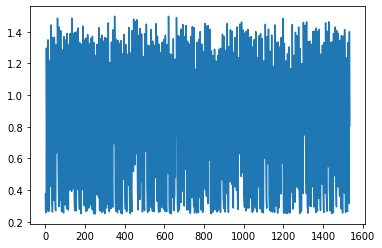

In [51]:
plt.plot(m)

In [54]:
y

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
filename,,,,,,,,,,,,,,,,,,,,,
nomad/opus/018b79a6-71a6-11ee-90d0-23a2e4ebf401_12000.wav,0.035880,-0.118344,0.059304,-0.033406,-0.038599,-0.103931,0.069757,-0.011499,-0.060170,-0.101314,...,0.039099,-0.095692,-0.014674,-0.041473,0.142404,0.094446,-0.053178,-0.061216,-0.005583,0.011869
nomad/opus/018b79a6-71a6-11ee-90d0-23a2e4ebf401_15000.wav,0.048210,-0.110297,0.048193,-0.030329,-0.037247,-0.113404,0.072553,-0.007532,-0.073111,-0.103829,...,0.051356,-0.110338,-0.000122,-0.022459,0.117879,0.074824,-0.054065,-0.056434,-0.001641,0.011139
nomad/opus/018b79a6-71a6-11ee-90d0-23a2e4ebf401_18000.wav,0.054564,-0.102455,0.044629,-0.026585,-0.033206,-0.117754,0.073012,-0.007191,-0.079765,-0.103475,...,0.057038,-0.115474,0.006671,-0.012892,0.103787,0.061364,-0.053875,-0.053661,0.000654,0.010794
nomad/opus/018b79a6-71a6-11ee-90d0-23a2e4ebf401_24000.wav,0.058739,-0.097782,0.041152,-0.025623,-0.031719,-0.119699,0.071601,-0.006382,-0.084399,-0.103695,...,0.060428,-0.118459,0.012605,-0.008630,0.092443,0.052665,-0.052780,-0.051394,0.001400,0.010046
nomad/opus/018b79a6-71a6-11ee-90d0-23a2e4ebf401_32000.wav,0.063494,-0.091364,0.037750,-0.024191,-0.029790,-0.122080,0.070687,-0.007494,-0.088930,-0.101593,...,0.063530,-0.120178,0.017244,-0.003444,0.080988,0.046671,-0.051642,-0.049261,0.002247,0.009205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nomad/opus/ffe56b4a-71a3-11ee-9d92-0b91db5d8ac3_24000.wav,0.041979,-0.118612,0.043722,-0.025603,-0.044588,-0.103862,0.060855,-0.008370,-0.056766,-0.109749,...,0.034193,-0.101194,-0.007834,-0.039046,0.132594,0.089940,-0.051228,-0.061823,-0.002844,0.005263
nomad/opus/ffe56b4a-71a3-11ee-9d92-0b91db5d8ac3_32000.wav,0.042499,-0.118117,0.043586,-0.023744,-0.045425,-0.103220,0.061206,-0.008510,-0.059152,-0.110010,...,0.033716,-0.100446,-0.007573,-0.038555,0.130561,0.088865,-0.050387,-0.062422,-0.002538,0.006553
nomad/opus/ffe56b4a-71a3-11ee-9d92-0b91db5d8ac3_6000.wav,0.039205,-0.031793,0.062985,-0.019384,-0.005348,-0.013571,0.059302,-0.028721,-0.037460,-0.100177,...,-0.037576,0.069873,-0.036355,-0.065390,0.064228,0.085834,-0.042214,-0.112732,0.017008,0.031401


In [9]:
import torch
from nomad_audio import nomad
from nomad_audio.nomad import Nomad

In [10]:
model = Nomad()

NOMAD running on: cuda


In [11]:
def count_parameters(model, verbose=False):
    total = 0
    for name, p in model.named_parameters():
        count = torch.ones_like(p).sum().item()

        if verbose:
            print(f"{name}: {count} parameters")

        total += count

    return total

In [12]:
print(count_parameters(model.model))

94568576.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(9)
y = x.copy()
np.random.shuffle(y)

In [4]:
M = np.vstack((x, y))

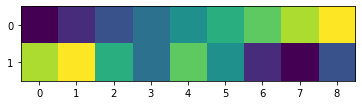

In [6]:
plt.imshow(M)

/tmp/ipykernel_2446067/1441004044.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'MOS', 'NOMAD', 'MOC', 'WARP-Q', 'PESQ'])


[Text(0, -1.0, ''),
 Text(0, 0.0, 'MOS'),
 Text(0, 1.0, 'NOMAD'),
 Text(0, 2.0, 'MOC'),
 Text(0, 3.0, 'WARP-Q'),
 Text(0, 4.0, 'PESQ'),
 Text(0, 5.0, '')]

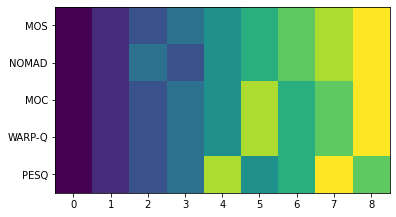

In [10]:
mos = np.array(
    [1, 2, 3, 4, 5, 6, 7, 8, 9]
)
nomad = np.array(
    [1, 2, 4, 3, 5, 6, 7, 8, 9]
)
moc = np.array(
    [1, 2, 3, 4, 5, 8, 6, 7, 9]
)
warpq = np.array(
    [1, 2, 3, 4, 5, 8, 6, 7, 9]
)
pesq = np.array(
    [1, 2, 3, 4, 8, 5, 6, 9, 7]
)

M = np.vstack((mos, nomad, moc, warpq, pesq))

fig, ax = plt.subplots()

ax.imshow(M)
ax.set_yticklabels(['', 'MOS', 'NOMAD', 'MOC', 'WARP-Q', 'PESQ'])

In [8]:
plt.set_yticklabels

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_yticklabels'